# First Analysis Script for Formal Bayesian Model Calibration
### Purpose of the Script
This script is used to read in the MCMC (at least two chains of the same size), plot their history plots (aka hairy catepillar plots), and check convergence using the Gelman-Rubin Diagnostic. There is one of these for Fall data and Spring data.

In [101]:
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
import seaborn as sns

First we read in the CSVs we need.

In [102]:
# Reads in CSVs

MCMC_chain_1 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[13].csv', names = [ 'Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])
MCMC_chain_2 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[277].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])
MCMC_chain_3 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[855].csv', names = [ 'Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])
MCMC_chain_4 = pd.read_csv('/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/std version of ll weighting (multiplied std by 4) sept 24/MCMC_Chain_Fall_Data_All_Params_100_iters_rit_data_stochastic_new_ll_adapted_binom_initial_iso_fixed_new_weighting_4_times_[974].csv', names = ['Iter', 'Freq Es', 'Time to Recovery',  'Percent Advancing', 'Rt' ,'Symptom Case Fatality', 'Days to Incubation', 'Test Sensitivity', 'Test Specificity', 'New Infect', 'Initial Infect', 'Initial Iso'])


Then we print to visually check.

In [144]:
MCMC_chain_1



array([[ 8.        , 19.9968253 , 19.73242724, ..., 10.        ,
        12.        ,  1.04878128],
       [ 9.        , 19.99660631, 19.72262905, ..., 10.        ,
        12.        ,  1.09143977],
       [ 9.        , 19.97488647, 19.84177861, ..., 10.        ,
        11.        ,  1.20334478],
       ...,
       [ 5.        , 18.37172065, 15.38792215, ..., 10.        ,
        10.        ,  0.66998919],
       [ 5.        , 18.37172065, 15.38792215, ..., 10.        ,
        10.        ,  0.66998919],
       [ 5.        , 18.37172065, 15.38792215, ..., 10.        ,
        10.        ,  0.66998919]])

Then we check for nan values.

In [104]:
MCMC_chain_4.isnull().values.any()


False

In [105]:
np.isinf(MCMC_chain_4).values.any()


False

In [106]:
MCMC_chain_3.isnull().values.any()


False

In [107]:
np.isinf(MCMC_chain_3).values.any()


False

In [108]:
MCMC_chain_2.isnull().values.any()


False

In [109]:
np.isinf(MCMC_chain_2).values.any()


False

In [110]:
MCMC_chain_1.isnull().values.any()


False

In [111]:
np.isinf(MCMC_chain_1).values.any()


False

Then we delete the columns we do not need which in this case is the iteration column.

In [112]:
# Remove unneeded columns

del MCMC_chain_1['Iter']

del MCMC_chain_2['Iter']

del MCMC_chain_3['Iter']

del MCMC_chain_4['Iter']


Then we print to visually check again.

In [113]:
# Print to visually check

MCMC_chain_1

,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Initial Infect,Initial Iso
0,8.0,19.996825,19.732427,1.777565,0.004234,5.104585,0.805157,1.220121,10.0,12.0,1.048781
1,9.0,19.996606,19.722629,1.785269,0.004369,5.083667,0.804773,1.219909,10.0,12.0,1.091440
2,9.0,19.974886,19.841779,1.788055,0.004317,5.163078,0.805800,1.219321,10.0,11.0,1.203345
3,9.0,20.059723,19.749386,1.803535,0.004319,5.277670,0.805251,1.218929,9.0,10.0,1.200909
4,9.0,20.059723,19.749386,1.803535,0.004319,5.277670,0.805251,1.218929,9.0,10.0,1.200909
...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,18.371721,15.387922,0.909633,0.000396,4.873119,0.783674,1.234282,10.0,10.0,0.669989
399996,5.0,18.371721,15.387922,0.909633,0.000396,4.873119,0.783674,1.234282,10.0,10.0,0.669989
399997,5.0,18.371721,15.387922,0.909633,0.000396,4.873119,0.783674,1.234282,10.0,10.0,0.669989
399998,5.0,18.371721,15.387922,0.909633,0.000396,4.873119,0.783674,1.234282,10.0,10.0,0.669989


Then we check the length of these chains to make sure they are:
1) The correct length
2) The same length

In [114]:
# Checks length of chain

print(len(MCMC_chain_1.iloc[:,0]))
print(len(MCMC_chain_2.iloc[:,0]))
print(len(MCMC_chain_3.iloc[:,0]))
print(len(MCMC_chain_4.iloc[:,0]))

400000
400000
400000
400000


Then we make the chains numpy arrays to make them easier to work with

In [115]:
# Makes the chains numpy arrays
MCMC_chain_1 = np.array(MCMC_chain_1)
MCMC_chain_2 = np.array(MCMC_chain_2)
MCMC_chain_3 = np.array(MCMC_chain_3)
MCMC_chain_4 = np.array(MCMC_chain_4)


In [116]:
# plt.plot(0, int(np.array(MCMC_chain_1[0,3])), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
# plt.plot(0, int(np.array(MCMC_chain_2[0,3])),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
# plt.plot(0, int(np.array(MCMC_chain_3[0,3])), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
# plt.plot(0,int(np.array(MCMC_chain_4[0,3]))

Then we plot our history plots to visually check convergence and make sure they are hairy catepillar plots. We make sure that our discrete distributions have integer values.

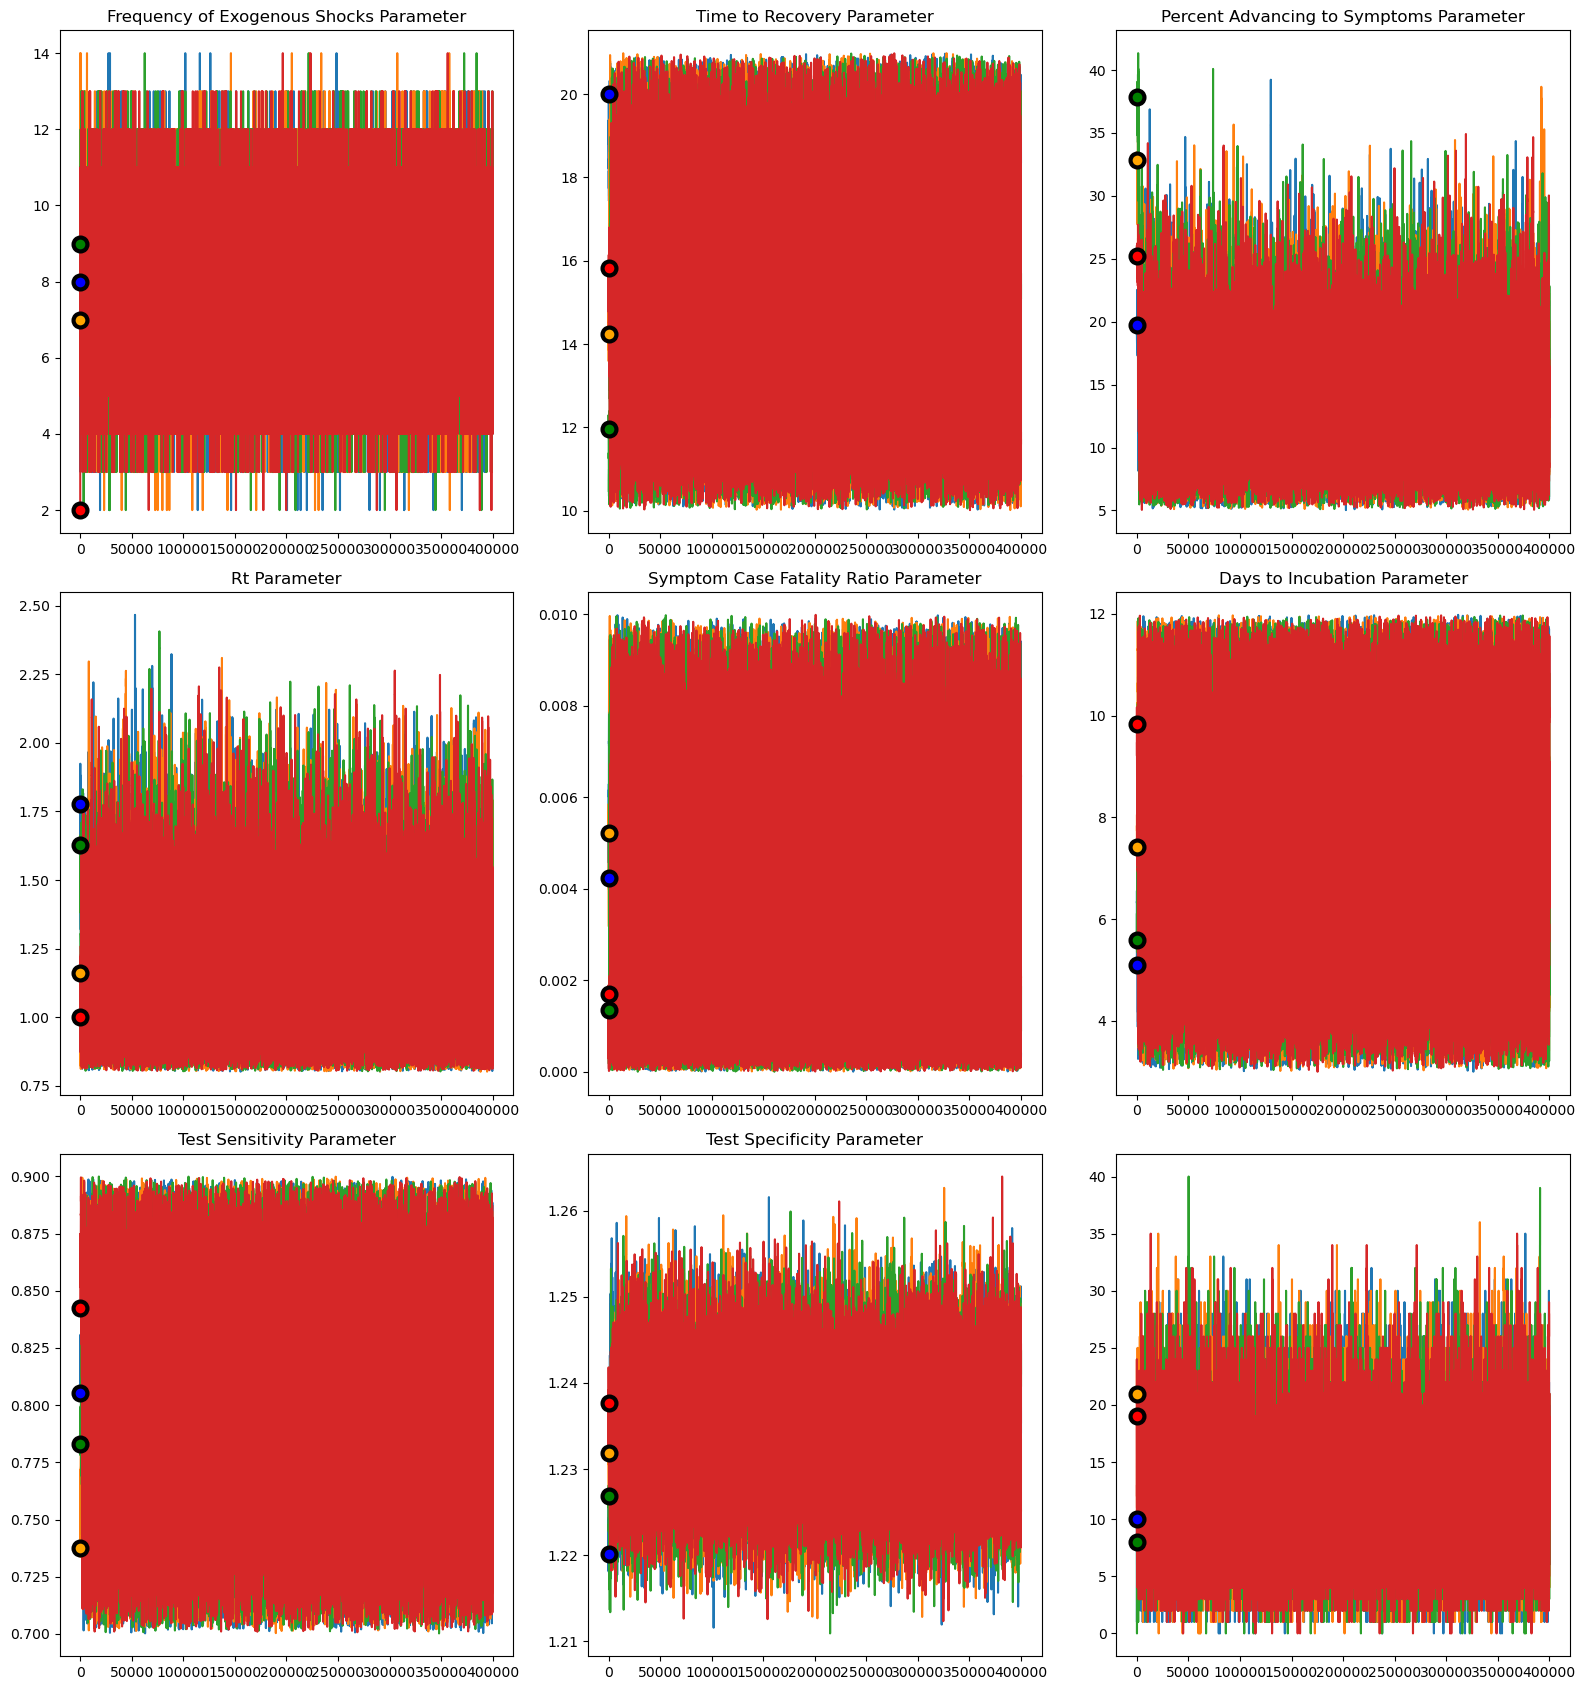

In [117]:
#Plots chains by parameter to visually see convergence
fig, axs = plt.subplots(3, 3)
fig.set_figheight(17)
fig.set_figwidth(16)

plt.subplot(3, 3, 1)
plt.plot(np.array(MCMC_chain_1[:,0], dtype = int))
plt.plot(np.array(MCMC_chain_2[:,0], dtype = int))
plt.plot(np.array(MCMC_chain_3[:,0], dtype = int))
plt.plot(np.array(MCMC_chain_4[:,0], dtype = int))
plt.plot(0, int(np.array(MCMC_chain_1[0,0])), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, int(np.array(MCMC_chain_2[0,0])),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, int(np.array(MCMC_chain_3[0,0])), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0,int(np.array(MCMC_chain_4[0,0])), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(np.array(MCMC_chain_3_150[:,0], dtype = int))
# plt.plot(np.array(MCMC_chain_4_150[:,0], dtype = int))
plt.title('Frequency of Exogenous Shocks Parameter')
# plt.show()


plt.subplot(3, 3, 2)
plt.plot(MCMC_chain_1[:,1])
plt.plot(MCMC_chain_2[:,1])
plt.plot(MCMC_chain_3[:,1])
plt.plot(MCMC_chain_4[:,1])
plt.plot(0, np.array(MCMC_chain_1[0,1]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,1]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,1]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0,np.array(MCMC_chain_4[0,1]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,1])
# plt.plot(MCMC_chain_4_150[:,1])
plt.title('Time to Recovery Parameter')
# plt.show()

plt.subplot(3, 3, 3)
plt.plot(MCMC_chain_1[:,2])
plt.plot(MCMC_chain_2[:,2])
plt.plot(MCMC_chain_3[:,2])
plt.plot(MCMC_chain_4[:,2])
plt.plot(0, np.array(MCMC_chain_1[0,2]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,2]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,2]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_4[0,2]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,2])
# plt.plot(MCMC_chain_4_150[:,2])
plt.title('Percent Advancing to Symptoms Parameter')
# plt.show()

plt.subplot(3, 3, 4)
plt.plot(MCMC_chain_1[:,3])
plt.plot(MCMC_chain_2[:,3])
plt.plot(MCMC_chain_3[:,3])
plt.plot(MCMC_chain_4[:,3])
plt.plot(0, np.array(MCMC_chain_1[0,3]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,3]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,3]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_4[0,3]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,3])
# plt.plot(MCMC_chain_4_150[:,3])
plt.title('Rt Parameter')
# plt.show()

plt.subplot(3, 3, 5)
plt.plot(MCMC_chain_1[:,4])
plt.plot(MCMC_chain_2[:,4])
plt.plot(MCMC_chain_3[:,4])
plt.plot(MCMC_chain_4[:,4])
plt.plot(0, np.array(MCMC_chain_1[0,4]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,4]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,4]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0,np.array(MCMC_chain_4[0,4]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,4])
# plt.plot(MCMC_chain_4_150[:,4])
plt.title('Symptom Case Fatality Ratio Parameter')
# plt.show()

plt.subplot(3, 3, 6)
plt.plot(MCMC_chain_1[:,5])
plt.plot(MCMC_chain_2[:,5])
plt.plot(MCMC_chain_3[:,5])
plt.plot(MCMC_chain_4[:,5])
plt.plot(0, np.array(MCMC_chain_1[0,5]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,5]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,5]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0,np.array(MCMC_chain_4[0,5]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,5])
# plt.plot(MCMC_chain_4_150[:,5])
plt.title('Days to Incubation Parameter')
# plt.show()

plt.subplot(3, 3, 7)
plt.plot(MCMC_chain_1[:,6])
plt.plot(MCMC_chain_2[:,6])
plt.plot(MCMC_chain_3[:,6])
plt.plot(MCMC_chain_4[:,6])
plt.plot(0, np.array(MCMC_chain_1[0,6]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,6]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,6]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_4[0,6]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,6])
# plt.plot(MCMC_chain_4_150[:,6])
plt.title('Test Sensitivity Parameter')
# plt.show()

plt.subplot(3, 3, 8)
plt.plot(MCMC_chain_1[:,7])
plt.plot(MCMC_chain_2[:,7])
plt.plot(MCMC_chain_3[:,7])
plt.plot(MCMC_chain_4[:,7])
plt.plot(0, np.array(MCMC_chain_1[0,7]), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, np.array(MCMC_chain_2[0,7]),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_3[0,7]), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0, np.array(MCMC_chain_4[0,7]), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# plt.plot(MCMC_chain_3_150[:,7])
# plt.plot(MCMC_chain_4_150[:,7])
plt.title('Test Specificity Parameter')
# # plt.show()

plt.subplot(3, 3, 9)
plt.plot(np.array(MCMC_chain_1[:,8], dtype = int))
plt.plot(np.array(MCMC_chain_2[:,8], dtype = int))
plt.plot(np.array(MCMC_chain_3[:,8], dtype = int))
plt.plot(np.array(MCMC_chain_4[:,8], dtype = int))
plt.plot(0, int(np.array(MCMC_chain_1[0,8])), 'o', color='black', markerfacecolor='blue', markersize = 10, markeredgewidth = 3 )
plt.plot(0, int(np.array(MCMC_chain_2[0,8])),'o', color='black', markerfacecolor='orange', markersize = 10, markeredgewidth = 3)
plt.plot(0, int(np.array(MCMC_chain_3[0,8])), 'o', color='black', markerfacecolor='green', markersize = 10, markeredgewidth = 3)
plt.plot(0,int(np.array(MCMC_chain_4[0,8])), 'o', color='black', markerfacecolor='red', markersize = 10, markeredgewidth = 3 )

# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('New Infections per Shock Parameter')

# plt.subplot(3, 3, 10)
# plt.plot(np.array(MCMC_chain_1[:,9], dtype = int))
# plt.plot(np.array(MCMC_chain_2[:,9], dtype = int))
# plt.plot(np.array(MCMC_chain_3[:,9], dtype = int))
# plt.plot(np.array(MCMC_chain_4[:,9], dtype = int))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Initially Infected Parameter')

# plt.subplot(3, 3, 11)
# plt.plot(np.array(MCMC_chain_1[:,10], dtype = int))
# plt.plot(np.array(MCMC_chain_2[:,10], dtype = int))
# plt.plot(np.array(MCMC_chain_3[:,10], dtype = int))
# plt.plot(np.array(MCMC_chain_4[:,10], dtype = int))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Delay Parameter')

# plt.subplot(3, 3, 12)
# plt.plot(np.array(MCMC_chain_1[:,11]))
# plt.plot(np.array(MCMC_chain_2[:,11]))
# plt.plot(np.array(MCMC_chain_3[:,11]))
# plt.plot(np.array(MCMC_chain_4[:,11]))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Non_Comp Parameter')

# plt.subplot(5, 2, 9)
# plt.plot(np.array(MCMC_chain_1[:,8], dtype = int))
# plt.plot(np.array(MCMC_chain_2[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('New Infections per Shock Parameter')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Initially Infected Parameter')

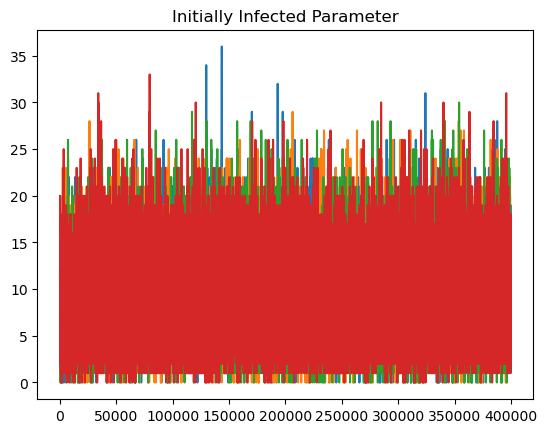

In [118]:
# plt.subplot(3, 3, 10)
plt.plot(np.array(MCMC_chain_1[:,9], dtype = int))
plt.plot(np.array(MCMC_chain_2[:,9], dtype = int))
plt.plot(np.array(MCMC_chain_3[:,9], dtype = int))
plt.plot(np.array(MCMC_chain_4[:,9], dtype = int))
# plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
plt.title('Initially Infected Parameter')

Text(0.5, 1.0, 'Initial Iso Population Parameter')

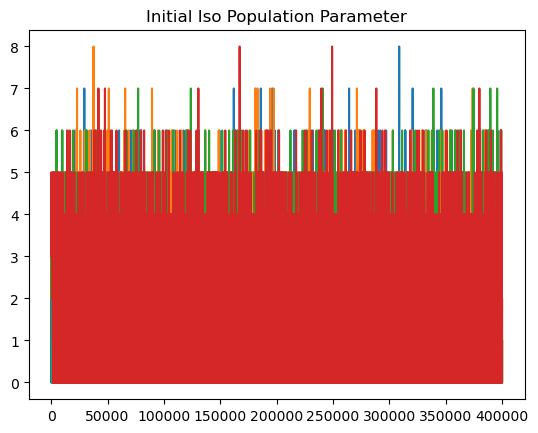

In [119]:
# plt.subplot(3, 3, 10)
plt.plot(np.array(MCMC_chain_1[:,10], dtype = int))
plt.plot(np.array(MCMC_chain_2[:,10], dtype = int))
plt.plot(np.array(MCMC_chain_3[:,10], dtype = int))
plt.plot(np.array(MCMC_chain_4[:,10], dtype = int))
# plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
plt.title('Initial Iso Population Parameter')

In [120]:
min(np.array(MCMC_chain_4[:,10]))

1.2053169460901623e-05

Text(0.5, 1.0, 'Regular Test Specificity Parameter')

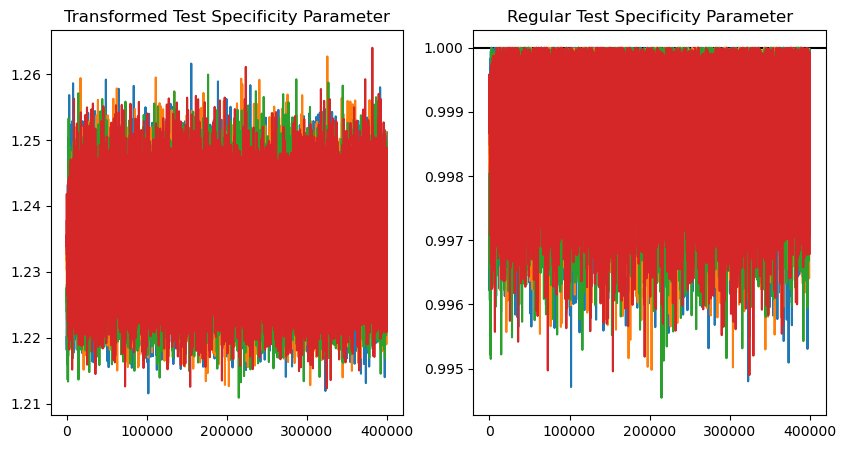

In [121]:
#Plots chains by parameter to visually see convergence
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)

plt.subplot(1,2,1)
plt.plot(MCMC_chain_1[:,7])
plt.plot(MCMC_chain_2[:,7])
plt.plot(MCMC_chain_3[:,7])
plt.plot(MCMC_chain_4[:,7])
# plt.plot(MCMC_chain_3_150[:,7])
# plt.plot(MCMC_chain_4_150[:,7])
plt.title('Transformed Test Specificity Parameter')

plt.subplot(1,2,2)
plt.axhline(y = 1, color = 'black')
plt.plot(np.sin(MCMC_chain_1[:,7]**2))
plt.plot(np.sin(MCMC_chain_2[:,7]**2))
plt.plot(np.sin(MCMC_chain_3[:,7]**2))
plt.plot(np.sin(MCMC_chain_4[:,7]**2))
# plt.plot(MCMC_chain_3_150[:,7])
# plt.plot(MCMC_chain_4_150[:,7])
plt.title('Regular Test Specificity Parameter')

Now we again make sure those discrete distibrution values are integers for when we test for convergence using the gelman-rubin diagnostic

In [122]:
# 150,000 interation chains
#changes freq_es, new_infect, initial infect, and delay to ints for anaylsis 

MCMC_chain_1[:,0]=np.array(MCMC_chain_1[:,0], dtype=int)
MCMC_chain_1[:,8]=np.array(MCMC_chain_1[:,8], dtype=int)
MCMC_chain_1[:,9]=np.array(MCMC_chain_1[:,9], dtype=int)
# MCMC_chain_1[:,10]=np.array(MCMC_chain_1[:,10], dtype=int)
# 
MCMC_chain_2[:,0]=np.array(MCMC_chain_2[:,0], dtype=int)
MCMC_chain_2[:,8]=np.array(MCMC_chain_2[:,8], dtype=int)
MCMC_chain_2[:,9]=np.array(MCMC_chain_2[:,9], dtype=int)
# MCMC_chain_2[:,10]=np.array(MCMC_chain_2[:,10], dtype=int)

MCMC_chain_3[:,0]=np.array(MCMC_chain_3[:,0], dtype=int)
MCMC_chain_3[:,8]=np.array(MCMC_chain_3[:,8], dtype=int)
MCMC_chain_3[:,9]=np.array(MCMC_chain_3[:,9], dtype=int)
# MCMC_chain_3[:,10]=np.array(MCMC_chain_3[:,10], dtype=int)

MCMC_chain_4[:,0]=np.array(MCMC_chain_4[:,0], dtype=int)
MCMC_chain_4[:,8]=np.array(MCMC_chain_4[:,8], dtype=int)
MCMC_chain_4[:,9]=np.array(MCMC_chain_4[:,9], dtype=int)
# MCMC_chain_4[:,10]=np.array(MCMC_chain_4[:,10], dtype=int)

# MCMC_chain_1[:,0]=np.array(MCMC_chain_1[:,0], dtype=int)
# MCMC_chain_1[:,8]=np.array(MCMC_chain_1[:,8], dtype=int)
# MCMC_chain_1[:,9]=np.array(MCMC_chain_1[:,9], dtype=int)

# MCMC_chain_2[:,0]=np.array(MCMC_chain_2[:,0], dtype=int)
# MCMC_chain_2[:,8]=np.array(MCMC_chain_2[:,8], dtype=int)
# MCMC_chain_2[:,9]=np.array(MCMC_chain_2[:,9], dtype=int)

Then we print each to visually check:

In [123]:
MCMC_chain_2[:,0]

array([7., 7., 7., ..., 9., 9., 9.])

In [124]:
MCMC_chain_2[:,8]

array([21., 21., 21., ..., 11., 11., 11.])

In [125]:
MCMC_chain_2[:,9]

array([11., 11., 11., ...,  4.,  4.,  4.])

In [126]:
# MCMC_chain_2[:,10]

### Using Inverse Transformation on Sp

In [127]:
MCMC_chain_1[:,7] = np.sin(MCMC_chain_1[:,7]**2)
MCMC_chain_2[:,7] = np.sin(MCMC_chain_2[:,7]**2)
MCMC_chain_3[:,7] = np.sin(MCMC_chain_3[:,7]**2)
MCMC_chain_4[:,7] = np.sin(MCMC_chain_4[:,7]**2)

### Testing Convergence

Then we set a convergence threshold to test for convergence. We continue to increase the convergence threshold until all the parameters converge.

In [149]:
convergence_threshold = 10000



In [150]:
MCMC_chain_4[:,7]


array([0.99924043, 0.99922018, 0.99927694, ..., 0.99975463, 0.99975463,
       0.99975463])

In [151]:
len(MCMC_chain_1[0,:])


11

Once we have set the convergence threshold we then run a Gelman-Rubin diagnostic to officilly diagnose our convergence.

In [152]:

#Runs GR diagnostic
chains = [ChainConsumer() for i in range(len(MCMC_chain_1[0,:]))]
converged = [False for i in range(len(MCMC_chain_1[0,:]))]
end = len(MCMC_chain_1[:,0])
for i in range(0, len(MCMC_chain_1[0,:])):
    if i==0: 
        name = 'Freq_ES' 
    elif i==1:  
        name = "Time_Recov" 
    elif i==2: 
        name = 'Percent_advance' 
    elif i==3: 
        name = 'Rt' 
    elif i==4: 
        name = 'Symptom_fatal' 
    elif i==5: 
        name = 'Days_to_Incubation'  
    elif i==6: 
        name = 'Test_Sensitivity'
    elif i==7: 
        name = 'Test_Specificity' 
    elif i==8: 
        name ='New_Infect'
    elif i==9:
        name = 'Initial_infect'
    elif i == 10:
        name = 'initial iso'
#     elif i == 11:
#         name = 'Non-compliance'
    chains[i].add_chain(np.concatenate((MCMC_chain_1[:convergence_threshold,i], MCMC_chain_2[:convergence_threshold,i], MCMC_chain_3[:convergence_threshold,i], MCMC_chain_4[:convergence_threshold,i])), walkers=4, name=name)
    converged = chains[i].diagnostic.gelman_rubin()


Gelman-Rubin Statistic values for chain Freq_ES
0: 1.00488 (Passed)
Gelman-Rubin Statistic values for chain Time_Recov
0: 1.02768 (Passed)
Gelman-Rubin Statistic values for chain Percent_advance
0: 1.02830 (Passed)
Gelman-Rubin Statistic values for chain Rt
0: 1.00755 (Passed)
Gelman-Rubin Statistic values for chain Symptom_fatal
0: 1.02103 (Passed)
Gelman-Rubin Statistic values for chain Days_to_Incubation
0: 1.02562 (Passed)
Gelman-Rubin Statistic values for chain Test_Sensitivity
0: 1.00935 (Passed)
Gelman-Rubin Statistic values for chain Test_Specificity
0: 1.02653 (Passed)
Gelman-Rubin Statistic values for chain New_Infect
0: 1.02610 (Passed)
Gelman-Rubin Statistic values for chain Initial_infect
0: 1.01189 (Passed)
Gelman-Rubin Statistic values for chain initial iso
0: 1.02863 (Passed)


## Cattepillar plots after convergence threshold

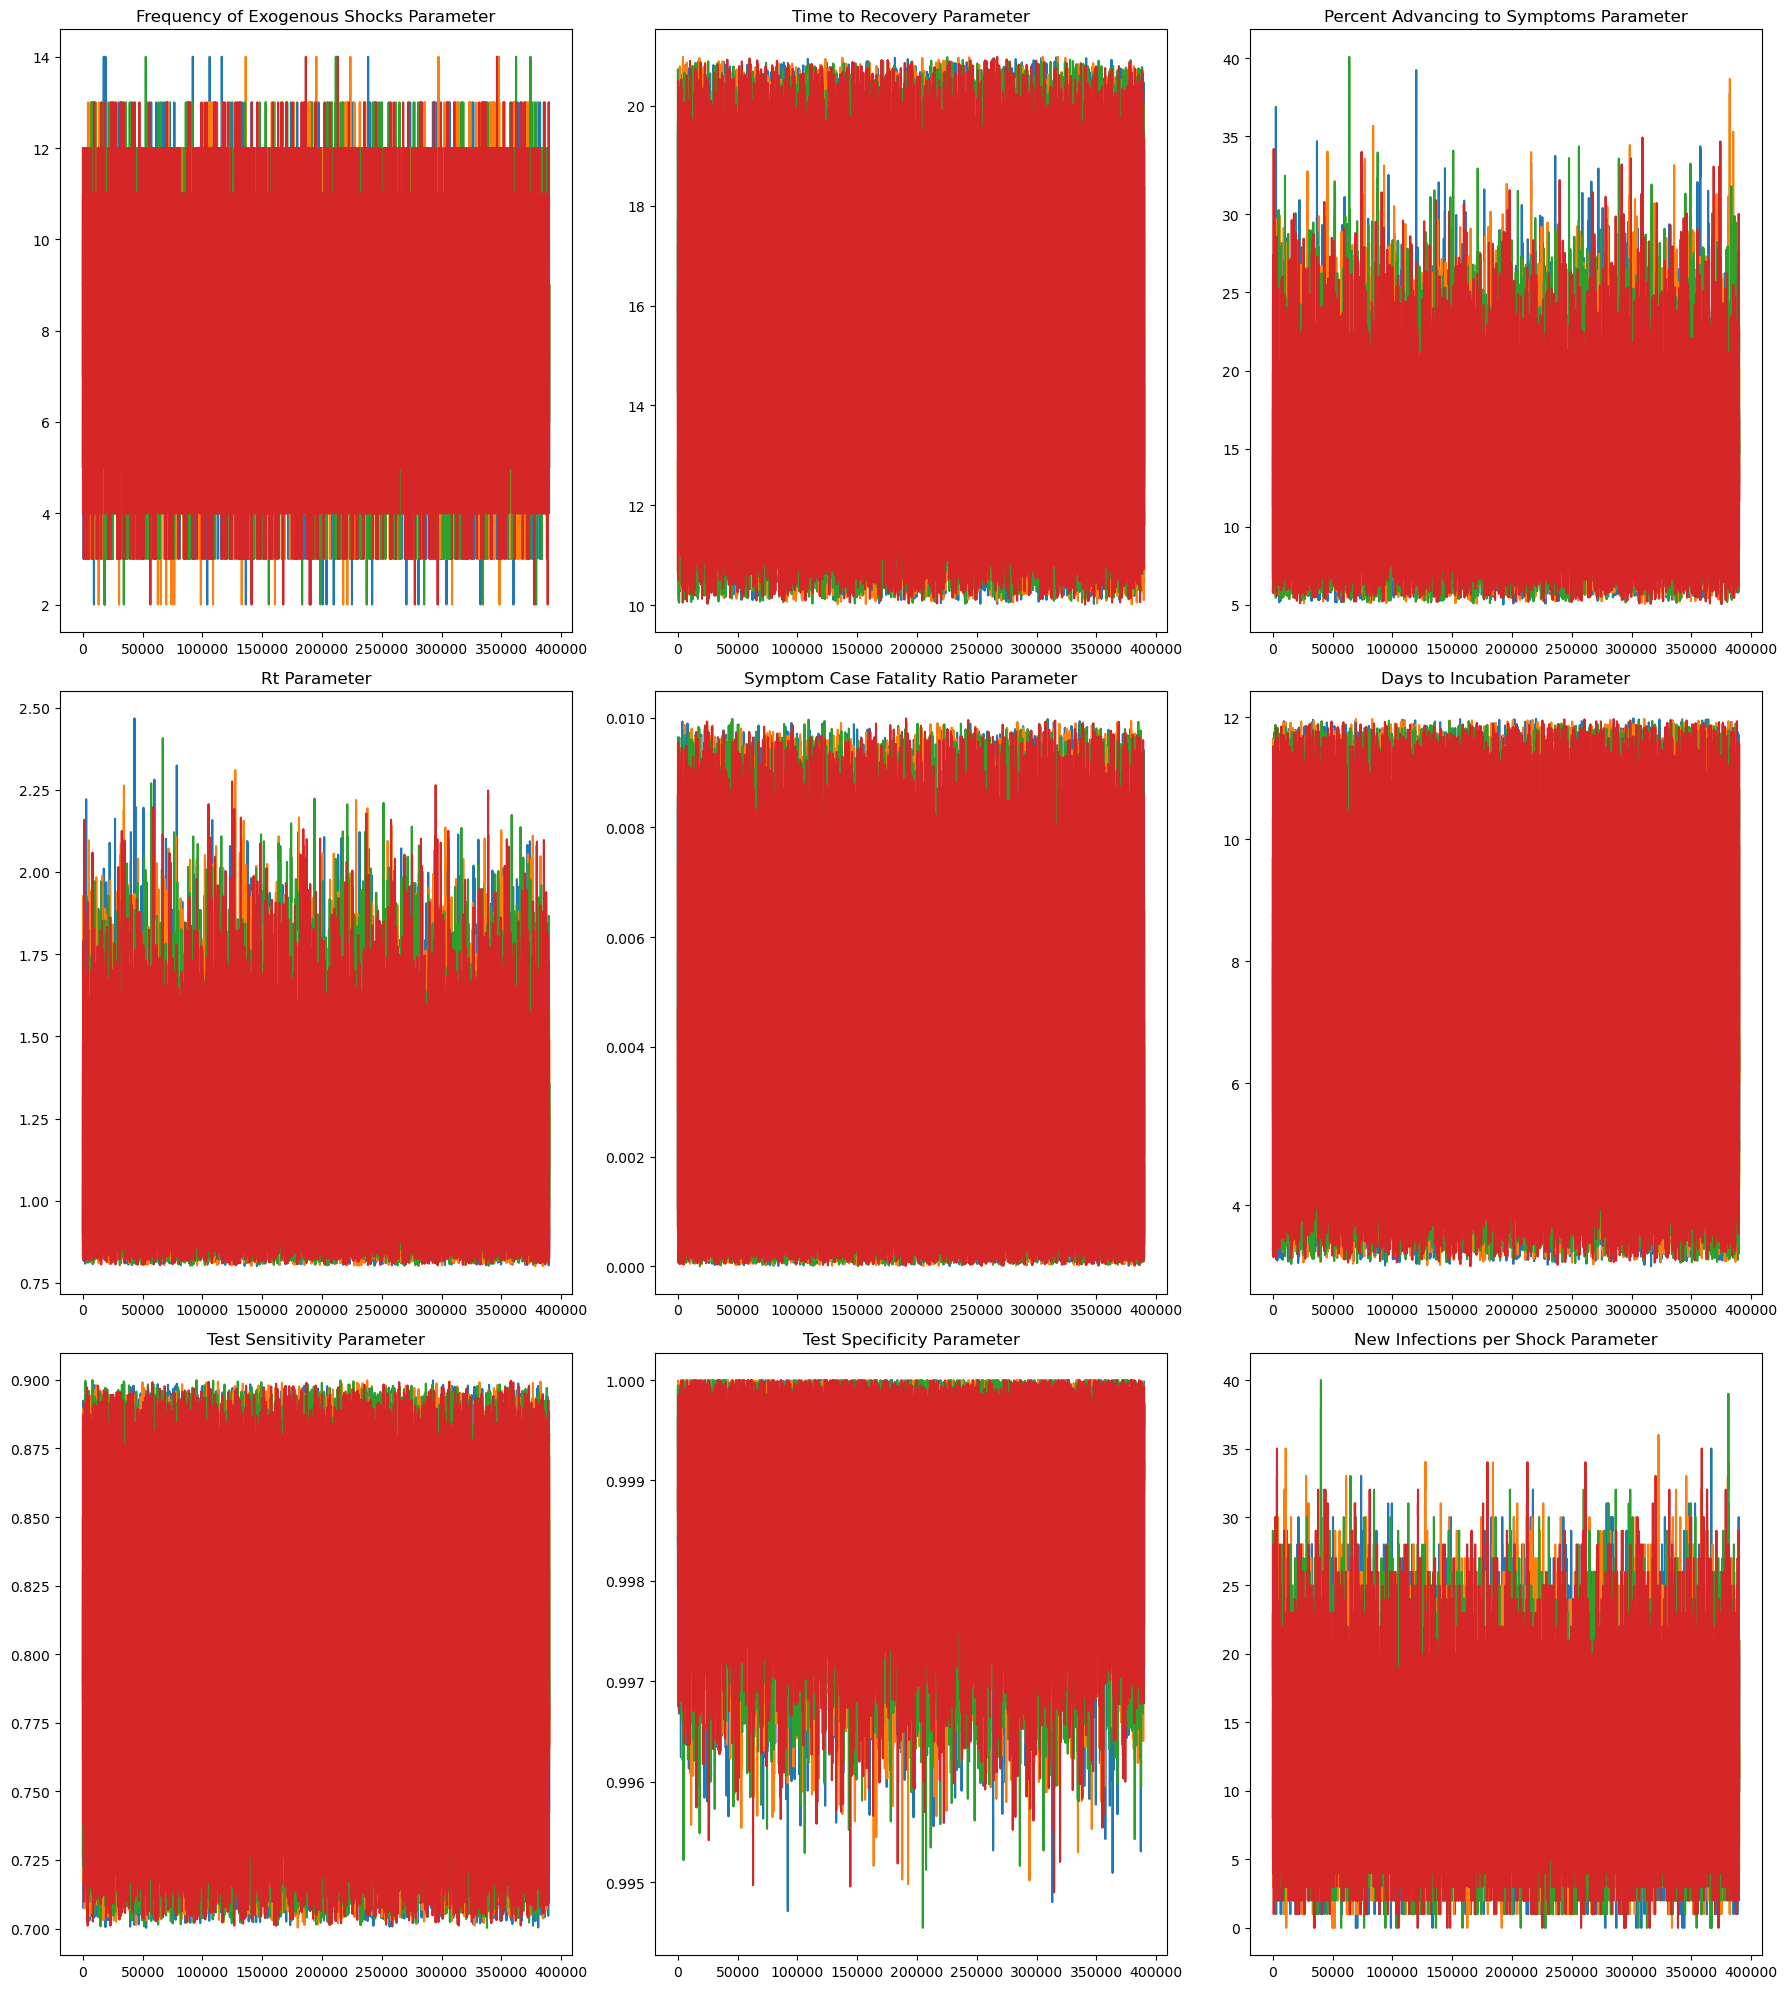

In [153]:
#Plots chains by parameter to visually see convergence
fig, axs = plt.subplots(3,3, figsize = (18,20))
# fig.set_figheight(17)
# fig.set_figwidth(16)

plt.subplot(3,3,1)
plt.plot(np.array(MCMC_chain_1[convergence_threshold:,0], dtype = int))
plt.plot(np.array(MCMC_chain_2[convergence_threshold:,0], dtype = int))
plt.plot(np.array(MCMC_chain_3[convergence_threshold:,0], dtype = int))
plt.plot(np.array(MCMC_chain_4[convergence_threshold:,0], dtype = int))
# plt.plot(np.array(MCMC_chain_3_150[:,0], dtype = int))
# plt.plot(np.array(MCMC_chain_4_150[:,0], dtype = int))
plt.title('Frequency of Exogenous Shocks Parameter')
# plt.show()


plt.subplot(3,3,2)
plt.plot(MCMC_chain_1[convergence_threshold:,1])
plt.plot(MCMC_chain_2[convergence_threshold:,1])
plt.plot(MCMC_chain_3[convergence_threshold:,1])
plt.plot(MCMC_chain_4[convergence_threshold:,1])
# plt.plot(MCMC_chain_3_150[:,1])
# plt.plot(MCMC_chain_4_150[:,1])
plt.title('Time to Recovery Parameter')
# plt.show()

plt.subplot(3,3,3)
plt.plot(MCMC_chain_1[convergence_threshold:,2])
plt.plot(MCMC_chain_2[convergence_threshold:,2])
plt.plot(MCMC_chain_3[convergence_threshold:,2])
plt.plot(MCMC_chain_4[convergence_threshold:,2])
# plt.plot(MCMC_chain_3_150[:,2])
# plt.plot(MCMC_chain_4_150[:,2])
plt.title('Percent Advancing to Symptoms Parameter')
# plt.show()

plt.subplot(3,3,4)
plt.plot(MCMC_chain_1[convergence_threshold:,3])
plt.plot(MCMC_chain_2[convergence_threshold:,3])
plt.plot(MCMC_chain_3[convergence_threshold:,3])
plt.plot(MCMC_chain_4[convergence_threshold:,3])
# plt.plot(MCMC_chain_3_150[:,3])
# plt.plot(MCMC_chain_4_150[:,3])
plt.title('Rt Parameter')
# plt.show()

plt.subplot(3,3,5)
plt.plot(MCMC_chain_1[convergence_threshold:,4])
plt.plot(MCMC_chain_2[convergence_threshold:,4])
plt.plot(MCMC_chain_3[convergence_threshold:,4])
plt.plot(MCMC_chain_4[convergence_threshold:,4])
# plt.plot(MCMC_chain_3_150[:,4])
# plt.plot(MCMC_chain_4_150[:,4])
plt.title('Symptom Case Fatality Ratio Parameter')
# plt.show()

plt.subplot(3,3,6)
plt.plot(MCMC_chain_1[convergence_threshold:,5])
plt.plot(MCMC_chain_2[convergence_threshold:,5])
plt.plot(MCMC_chain_3[convergence_threshold:,5])
plt.plot(MCMC_chain_4[convergence_threshold:,5])
# plt.plot(MCMC_chain_3_150[:,5])
# plt.plot(MCMC_chain_4_150[:,5])
plt.title('Days to Incubation Parameter')
# plt.show()

plt.subplot(3,3,7)
plt.plot(MCMC_chain_1[convergence_threshold:,6])
plt.plot(MCMC_chain_2[convergence_threshold:,6])
plt.plot(MCMC_chain_3[convergence_threshold:,6])
plt.plot(MCMC_chain_4[convergence_threshold:,6])
# plt.plot(MCMC_chain_3_150[:,6])
# plt.plot(MCMC_chain_4_150[:,6])
plt.title('Test Sensitivity Parameter')
# plt.show()

plt.subplot(3,3,8)
plt.plot(MCMC_chain_1[convergence_threshold:,7])
plt.plot(MCMC_chain_2[convergence_threshold:,7])
plt.plot(MCMC_chain_3[convergence_threshold:,7])
plt.plot(MCMC_chain_4[convergence_threshold:,7])
# plt.plot(MCMC_chain_3_150[:,7])
# plt.plot(MCMC_chain_4_150[:,7])
plt.title('Test Specificity Parameter')
# plt.show()

plt.subplot(3,3,9)
plt.plot(np.array(MCMC_chain_1[convergence_threshold:,8]))
plt.plot(np.array(MCMC_chain_2[convergence_threshold:,8]))
plt.plot(np.array(MCMC_chain_3[convergence_threshold:,8]))
plt.plot(np.array(MCMC_chain_4[convergence_threshold:,8]))
# plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
plt.title('New Infections per Shock Parameter')

# plt.subplot(3,3,10)
# plt.plot(np.array(MCMC_chain_1[convergence_threshold:,9]))
# plt.plot(np.array(MCMC_chain_2[convergence_threshold:,9]))
# plt.plot(np.array(MCMC_chain_3[convergence_threshold:,9]))
# plt.plot(np.array(MCMC_chain_4[convergence_threshold:,9]))
# # # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Initially Infected Parameter')

# plt.subplot(3,3, 11)
# plt.plot(np.array(MCMC_chain_1[convergence_threshold:,10]))
# plt.plot(np.array(MCMC_chain_2[convergence_threshold:,10]))
# plt.plot(np.array(MCMC_chain_3[convergence_threshold:,10]))
# plt.plot(np.array(MCMC_chain_4[convergence_threshold:,10]))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Delay Parameter')

# plt.subplot(3,3, 12)
# plt.plot(np.array(MCMC_chain_1[convergence_threshold:,11]))
# plt.plot(np.array(MCMC_chain_2[convergence_threshold:,11]))
# plt.plot(np.array(MCMC_chain_3[convergence_threshold:,11]))
# plt.plot(np.array(MCMC_chain_4[convergence_threshold:,11]))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('Non_Comp Parameter')
plt.tight_layout()
plt.show()
# plt.subplot(3,3,9)
# plt.plot(np.array(MCMC_chain_1[:,8], dtype = int))
# plt.plot(np.array(MCMC_chain_2[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
# plt.title('New Infections per Shock Parameter')
# plt.show()

Text(0.5, 1.0, 'Initially Infected Parameter')

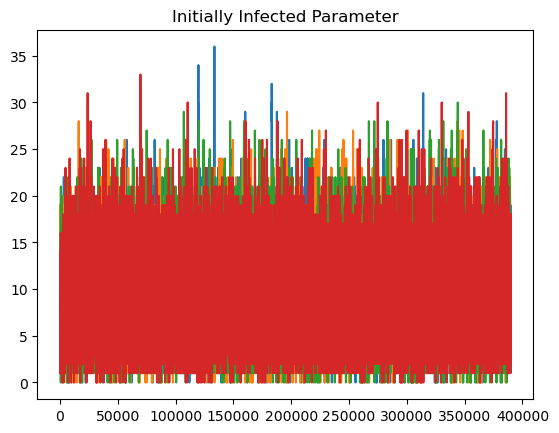

In [154]:
# plt.subplot(3,3,10)
plt.plot(np.array(MCMC_chain_1[convergence_threshold:,9]))
plt.plot(np.array(MCMC_chain_2[convergence_threshold:,9]))
plt.plot(np.array(MCMC_chain_3[convergence_threshold:,9]))
plt.plot(np.array(MCMC_chain_4[convergence_threshold:,9]))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
plt.title('Initially Infected Parameter')

Text(0.5, 1.0, 'Initiall Iso Pop Parameter')

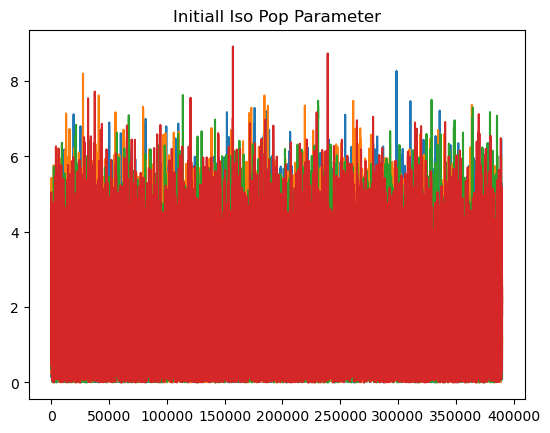

In [155]:
# plt.subplot(3,3,10)
plt.plot(np.array(MCMC_chain_1[convergence_threshold:,10]))
plt.plot(np.array(MCMC_chain_2[convergence_threshold:,10]))
plt.plot(np.array(MCMC_chain_3[convergence_threshold:,10]))
plt.plot(np.array(MCMC_chain_4[convergence_threshold:,10]))
# # plt.plot(np.array(MCMC_chain_3_150[:,8], dtype = int))
# # plt.plot(np.array(MCMC_chain_4_150[:,8], dtype = int))
plt.title('Initiall Iso Pop Parameter')

In [156]:
min((np.array(MCMC_chain_4[convergence_threshold:,10])))

1.2053169460901623e-05

One last thing I want to check is the max values of the inverse transformed Sp values

In [157]:
print(max(MCMC_chain_1[:,7]))
print(max(MCMC_chain_2[:,7]))
print(max(MCMC_chain_3[:,7]))
print(max(MCMC_chain_4[:,7]))

0.9999999995148491
0.9999999999743465
0.9999999999787085
0.99999999999583
